In [12]:
import numpy as np

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#importing dataset

cols= ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df= pd.read_csv("magic04.data",names=cols)


In [42]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [35]:
df["class"]= (df["class"]=="g").astype(int)

In [37]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [38]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


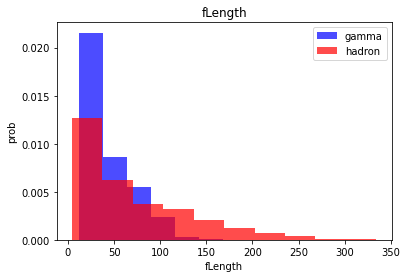

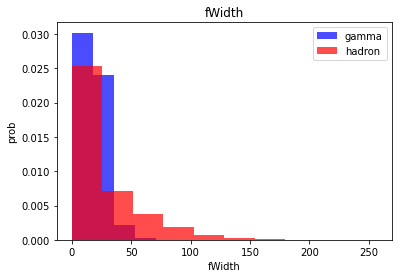

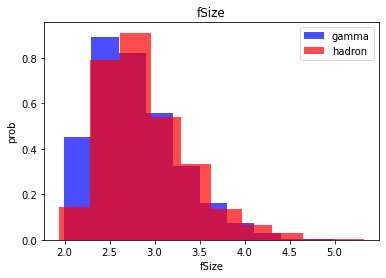

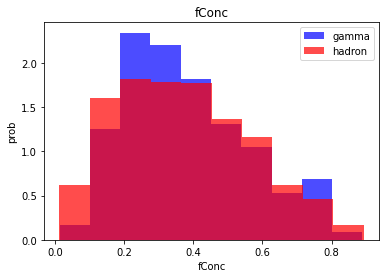

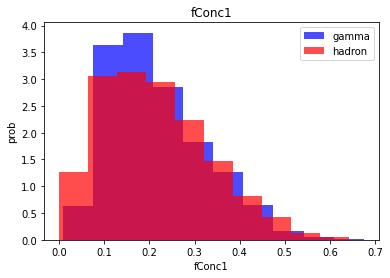

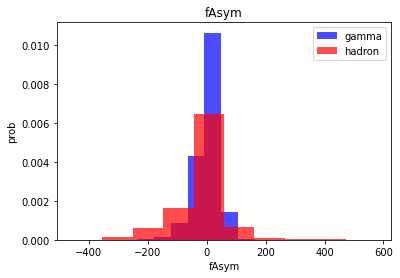

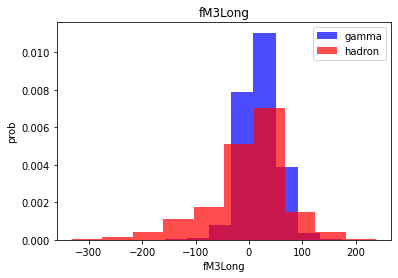

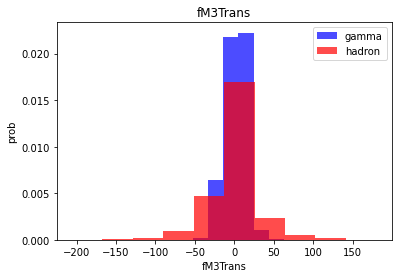

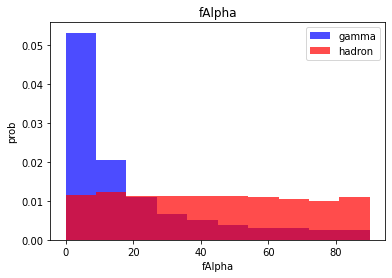

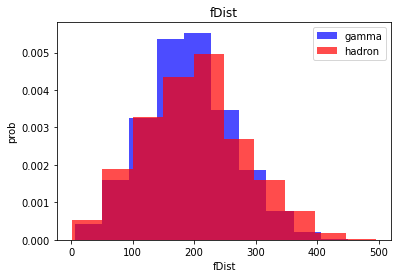

In [39]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color='red',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("prob")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [40]:
#train ,validation ,test on dataset 

train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
from imblearn.over_sampling import RandomOverSampler

In [43]:
def scale_dataset(dataframe,oversample=False):
  x= dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()  
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x,y= ros.fit_resample(x,y)

  data =np.hstack((x,np.reshape(y,(-1,1))))
  return data, x,y


In [44]:
print(len(train[train["class"]==1])) 
print(len(train[train["class"]==0])) 

7415
3997


In [45]:
train,x_train,y_train= scale_dataset(train,oversample=True)
valid,x_valid,y_valid= scale_dataset(valid,oversample=False)
test,x_test,y_test= scale_dataset(test,oversample=False)

In [ ]:
#KNN classification

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [61]:
from sklearn import neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [62]:
y_pred= knn_model.predict(x_test)

In [63]:
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [64]:
y_test

array([0, 1, 0, ..., 1, 0, 1])

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1360
           1       0.84      0.86      0.85      2444

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [66]:
 #Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB

In [70]:
nb_model = GaussianNB()
nb_model=nb_model.fit(x_train,y_train)


In [72]:
y_pred=nb_model.predict(x_test)

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.39      0.50      1360
           1       0.73      0.90      0.80      2444

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.69      3804



In [75]:
 #logistic Regration

In [76]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr_model = LogisticRegression() 

lr_model=lr_model.fit(x_train,y_train)

In [83]:
y_pred = lr_model.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1408
           1       0.82      0.84      0.83      2396

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804

